<a href="https://colab.research.google.com/github/radhakrishnan-omotec/arwan-iris-dog-repo/blob/main/Dog_classification_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Bark Analysis

Automated Dog Bark Classification
Using Machine Learning for Breed-Specific Analysis

### Arwan Makhija

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/arwan-iris-dog-repo.git

Cloning into 'arwan-iris-dog-repo'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 8.79 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/arwan-iris-dog-repo/dog_audio.csv')
audioPath = ('/content/arwan-iris-dog-repo')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100652-3-0-0.wav,100652,0.0,4.000000,1,2,3,dog_bark
2,100652-3-0-1.wav,100652,0.5,4.500000,1,2,3,dog_bark
3,100652-3-0-2.wav,100652,1.0,5.000000,1,2,3,dog_bark
4,100652-3-0-3.wav,100652,1.5,5.500000,1,2,3,dog_bark


In [ ]:
data.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
995,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,3,dog_bark
996,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,3,dog_bark
997,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,3,dog_bark
998,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,3,dog_bark
999,99185-3-0-0.wav,99185,0.341411,0.950911,1,5,3,dog_bark


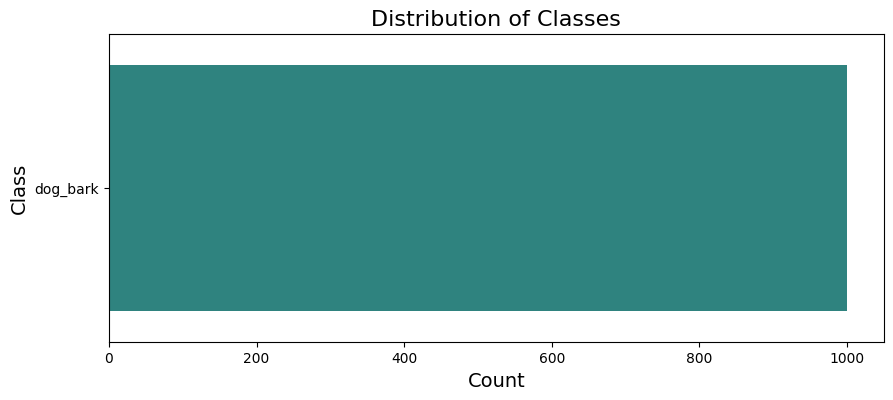

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(y = data['class'], palette = 'viridis')
plt.title('Distribution of Classes', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Class', fontsize = 14)
plt.show()

In [ ]:
# Displaying a random waveform and spectrogram

# Randomly selecting a row
row = data.sample(1).iloc[0]

# Constructing file path
audioFile = os.path.join(audioPath, 'fold' + str(row['fold']), row['slice_file_name'])

# Loading audio file
waveform, sampleRate = librosa.load(audioFile)

# Displaying audio
print(f"Class : {row['class']}\n")
ipd.display(ipd.Audio(waveform, rate = sampleRate))

# Displaying waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(waveform)
plt.title('Waveform', fontsize = 16)
plt.xlabel('Sample Index', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

# Displaying spectrogram
plt.subplot(1, 2, 2)
plt.specgram(waveform, Fs = sampleRate)
plt.title('Spectrogram', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Frequency (Hz)', fontsize = 12)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/arwan-iris-dog-repo/fold9/105088-3-0-10.wav'

In [11]:
# STEP 1: Connect to the Google Drive
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful